# Homework #5

## Ensemble learning

This colaboratory contains Homework #5 of the Machine Learning course, which is due **November 16, midnight (23:59 EEST time)**. To complete the homework, extract **(File -> Download .ipynb)** and submit to the course webpage.


## Submission's rules:

1.   Please, submit only .ipynb that you extract from the Colaboratory.
2. Run your homework exercises before submitting (output should be present, preferably restart the kernel and press run all the cells).
3. Do not change the description of tasks in red (even if there is a typo|mistake|etc).
4. Please, make sure to avoid unnecessary long printouts.
5. Each task should be solved right under the question of the task and not elsewhere.
6. Solutions to both regular and bonus exercises should be submitted in one IPYNB file.

Please, steer clear of copying someone else's work. If you discuss assignments with anyone in the course, please, mention their names here:

Pooh

##List of Homework's exercises:

1.   [Ex1](#scrollTo=ux5PBYkbwewj) - 2 points
2.   [Ex2](#scrollTo=Z5C3GX9eXFF_) - 4 points
3.   [Ex3](#scrollTo=uHQscVCD7rM0) - 4 points
4.   [Bonus 1](#scrollTo=iJeG56t9-jWI) - 1 point
5.   [Bonus 2](#scrollTo=cLoHOqAcu0Q9) - up to 3 points
6.   [Bonus 3](#scrollTo=jdZkblZW7bEp) - up to 3 points (based on quality of presentation)




---


## Homework exercise 1: implement and train a bagging classifier with 3 K-NN models as estimators (2 points)


<font color='red'> In this exercise you will need to use `classify_knn` function from the first practice session to train three different KNN models on three resamples of this dataset. </font>


In [1]:
import pandas as pd
import numpy as np

In [2]:
def create_random_2c_data (D, N):
  """
  Function create_random_2c_data generates two sets of D dimensional
  points (N points each), one for each class. The first set is sampled from D
  dimensional Gaussian distribution with mean 0 and standard deviation 1. The
  second set is generated from the distribution, with mean 1 and standard
  deviation 1.
  """
  # Generating N points for the first class
  mu_vec1 = np.zeros(D) # creates a vector of zeros, these are averages across each dimension
  cov_mat1 = np.eye(D) # creates a diagonal matrix of size D x D, all values except diagonal are 0
  class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, N)

  # The same stuff as above, just averages are shifted into 1
  mu_vec2 = np.ones(D) # creates a vector of ones
  cov_mat2 = np.eye(D)
  class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, N)

  # a lot of boring things....
  # gluing together two matrices generated above
  data = pd.DataFrame(np.concatenate((class1_sample, class2_sample)))

  # Create names for columns
  data.columns = [ 'x' + str(i) for i in (np.arange(D)+1)]

  # Create a class column
  data['class'] = np.concatenate((np.repeat(0, N), np.repeat(1, N)))

  # This is important for plotting and modelling
  data['class'] = data['class'].astype('category')

  return data

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
np.random.seed(2342347823) # random seed, this number was random, no need to build conspiracies around it

D = 2 # two dimensions
N = 100 # points per class

whole_data = create_random_2c_data(D, N)

# Randomly splitting data into train (60%) and validation (40%)
train, val = train_test_split(whole_data, random_state = 111, test_size = 0.40)

n_bootstraps = 3
np.random.seed(1111)

# creating resamples
resamples = [resample(train, n_samples = len(train), replace=True).index.values for i in range(n_bootstraps)]

# first resample
train_resample1 = train.loc[resamples[0]]

# second resample
train_resample2 = train.loc[resamples[1]]

# third resample
train_resample3 = train.loc[resamples[2]]

<font color='red'> Here, I just convert pandas DataFrame into Numpy arrays that are easier to use list comprehension mechanisms on. </font>

In [4]:
train1 = np.asarray(train_resample1[['x1','x2']])
labels1 = np.asarray(train_resample1[['class']]).reshape((train_resample1.shape[0]))

train2 = np.asarray(train_resample2[['x1','x2']])
labels2 = np.asarray(train_resample2[['class']]).reshape((train_resample2.shape[0]))

train3 = np.asarray(train_resample3[['x1','x2']])
labels3 = np.asarray(train_resample3[['class']]).reshape((train_resample3.shape[0]))

val_points = np.asarray(val[['x1','x2']])
val_labels = np.asarray(val[['class']]).reshape((val.shape[0]))

<font color='red'>  **(Homework exercise 1- a)** Copy and adapt `classify_knn` function from the first homework and practice session to operate on 2D points. **(0.5 points)**</font>

In [5]:
def dist(point1, point2): # function dist is also from the first practice session
  # sum of squared coordinate-wise differences under sqrt
  return(np.sqrt(np.sum((point2 - point1)**2)))

def classify_knn(val_point, k, train, labels):

  ##### YOUR CODE STARTS #####
  all_distances = [dist(val_point, train_point) for train_point in train]
  nearest_neighbours = np.argsort(all_distances)[:k]
  predicted_classes = labels[nearest_neighbours]
  prediction = np.argmax(np.bincount(predicted_classes))
  ##### YOUR CODE ENDS #####

  return prediction

<font color='red'> Test that the function was adapted correctly by running the following example </font>

In [6]:
val_point = val_points[1]
print(f'predicted class of the first point is {classify_knn(val_point, 5,  train1, labels1)}, while the true class is {val_labels[1]}')

predicted class of the first point is 0, while the true class is 0


<font color='red'> **(Homework exercise 1- b)** Classify each point from the validation set using `classify_knn` function. Use different resamples and list comprehension. Fix `k` at 5. **(1 point)**</font>


In [7]:
k = 5

# Use three K-NN models that work on three different resamples

##### YOUR CODE STARTS #####
val['knn1'] = [classify_knn(point, k, train1, labels1) for point in val_points]
val['knn2'] = [classify_knn(point, k, train2, labels2) for point in val_points]
val['knn3'] = [classify_knn(point, k, train3, labels3) for point in val_points]
##### YOUR CODE ENDS #####

<font color='red'> Below aggregate individual predictions using the majority vote approach</font>

In [8]:
##### YOUR CODE STARTS #####
val['knn_bagging'] = val[['knn1', 'knn2', 'knn3']].mode(axis=1)[0]
##### YOUR CODE ENDS #####

print(f"Accuracy of hand made bagged ensemble with 3 KNNs is {np.sum(val['knn_bagging'] == val['class'])/len(val[['class']])*100}%")

Accuracy of hand made bagged ensemble with 3 KNNs is 66.25%


<font color='red'> **(Homework exercise 1- c)** Use sklearn `BaggingClassifier` to implement analogous model that uses KNeighborsClassifier as an estimator (with k = 5). Don't forget to use a random state for reproducibility.

Assess its performance on the same validation set and display it. **(0.5 points)**</font>


In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

##### YOUR CODE STARTS #####
knn = KNeighborsClassifier(n_neighbors=5)
knn_bagger = BaggingClassifier(
    estimator=knn,
    n_estimators=3,
    random_state=42
)
knn_bagger.fit(train[['x1', 'x2']], train['class'])
##### YOUR CODE ENDS #####
print(f"Accuracy of sklearn bagging with {3} KNNs {knn_bagger.score(val[['x1', 'x2']], val[['class']])*100}%")

Accuracy of sklearn bagging with 3 KNNs 72.5%


## Homework exercise 2: eXtreme Gradient Boosting (XGBoost) (4 points)

<font color='red'> Let's finally build for ourselves a new shiny XGBoost model, the most popular algorithm for Kaggle competitions. </font>
<font color='red'>  Since XGBoost truly shines on tabular data, we are going to use the Thyroid Disease Dataset for training an XGboost model. Further details about this dataset can be found at
 [here](https://www.openml.org/search?type=data&status=active&id=40475). </font>


In [10]:
from sklearn.datasets import fetch_openml

data = fetch_openml(name="thyroid-allhyper")

In [11]:
#Let's take a look at data
data.data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26
0,41.0,1,1,1,1,1,1,1,1,1,...,2,1.30000,2,2.500000,2,125.0,2,1.140000,2,109.000000
1,23.0,1,1,1,1,1,1,1,1,1,...,2,4.10000,2,2.000000,2,102.0,1,0.997912,1,110.787984
2,46.0,2,1,1,1,1,1,1,1,1,...,2,0.98000,1,2.024966,2,109.0,2,0.910000,2,120.000000
3,70.0,1,2,1,1,1,1,1,1,1,...,2,0.16000,2,1.900000,2,175.0,1,0.997912,1,110.787984
4,70.0,1,1,1,1,1,1,1,1,1,...,2,0.72000,2,1.200000,2,61.0,2,0.870000,2,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70.0,2,1,1,1,1,1,1,1,1,...,2,2.70000,1,2.024966,2,155.0,2,1.050000,2,148.000000
2796,73.0,2,1,2,1,1,1,1,1,1,...,1,4.67215,2,0.700000,2,63.0,2,0.880000,2,72.000000
2797,75.0,2,1,1,1,1,1,1,1,1,...,1,4.67215,1,2.024966,2,147.0,2,0.800000,2,183.000000
2798,60.0,1,1,1,1,1,1,1,1,1,...,2,1.40000,1,2.024966,2,100.0,2,0.830000,2,121.000000


In [12]:
# Types of classes
data.target

,Class
0,3
1,1
2,1
3,1
4,5
...,...
2795,5
2796,1
2797,1
2798,1


In [13]:
# Number of instances for each class
data.target.value_counts()

,count
Class,
1,1632
5,771
3,275
2,91
4,31


<font color='red'> **(Homework exercise 2- a)** Complete the preprocessing steps and train the XGBoost model for the Thyroid Disease classification task.
Find additional information regarding the training of an XGBoost model [here](https://xgboost.readthedocs.io/en/latest/python/python_intro.html) **(1.5 points)** </font>

In [14]:
# Initial data preparation, which involves spliting the dataset into training, validation, and test sets
# Use 80/10/10 datasplit

##### YOUR CODE STARTS #####
X = data.data
y = data.target.astype(int) - 1

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)
##### YOUR CODE ENDS #####

In [15]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

##### YOUR CODE STARTS #####

# XGBoost wants data to be wrapped into special formats
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dval = xgb.DMatrix(X_val, label=y_val, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# Define the XGBoost parameters (you can add more parameters if you want)
params = {
    "booster": "gbtree", # tree, I guess? :)
    "eta": 0.1,
    "objective": "multi:softmax",
    "eval_metric": "mlogloss",
    "num_class": 5,
    "seed": 42
}

# Train for training and val for validation
eval_list = [(dtrain, 'train'), (dval, 'eval')]


# Train the XGBoost model
bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=200,
    evals=eval_list,
    early_stopping_rounds=10,
    verbose_eval=False
)
##### YOUR CODE ENDS #####

<font color='red'> **(Homework exercise 2- b)**  Make predictions on the test data and evaluate the model **(0.5 points)** </font>

In [16]:
##### YOUR CODE STARTS #####
y_pred = bst.predict(dtest)

y_pred_corrected = y_pred + 1

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy*100:.2f}%")
##### YOUR CODE ENDS #####

Test accuracy: 69.64%


<font color='red'> **(Homework exercise 2- c)**  In machine learning, feature importance scores are used to determine the relative importance of each feature in a dataset when building a predictive model. Such scores can be derived from a variety of different models, including ensembles. Explore feature importance of the resulting XGBoost model and report the top five most important features **(0.5 points)** </font>



In [17]:
##### YOUR CODE STARTS #####
importance_dict = bst.get_score(importance_type='weight')

importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Importance': list(importance_dict.values())
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

top5_features = importance_df.head(5)
print(top5_features)
##### YOUR CODE ENDS #####

   Feature  Importance
0       V1      1457.0
16     V18      1179.0
20     V22      1084.0
24     V26      1052.0
22     V24       856.0


<font color='red'> **(Homework exercise 2- d)** Train Adaptive Boosting, Gradient Boosting and a simple KNN model from sklearn (KNeighborsClassifier) on the same training data and evaluate on the same test data. For each model use the default hyperparameters (e.g. `n_estimators` or `n_neighbors`). If you do not want to use default parameters, you can use `cross_val_score` to pick the best values for the hyperparameters using training data. Compare the performance of these three models and XGBoost and draw conclusions in a separate text cell  **(1.5 points)** </font>

In [18]:
# AdaBoostClassifier
%%time
##### YOUR CODE STARTS #####
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

ada_clf = AdaBoostClassifier(random_state=42)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)
acc_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost test accuracy: {acc_ada*100:.2f}%")
##### YOUR CODE ENDS #####

AdaBoost test accuracy: 66.07%
CPU times: user 779 ms, sys: 5.44 ms, total: 784 ms
Wall time: 784 ms


In [19]:
# GradientBoostingClassifier
%%time
# might take considerable time if trained with default number of n_estimators
##### YOUR CODE STARTS #####
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting test accuracy: {acc_gb*100:.2f}%")
##### YOUR CODE ENDS #####

Gradient Boosting test accuracy: 70.71%
CPU times: user 2.92 s, sys: 8.52 ms, total: 2.93 s
Wall time: 3.01 s


In [20]:
# KNeighborsClassifier
%%time
##### YOUR CODE STARTS #####
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN test accuracy: {acc_knn*100:.2f}%")
##### YOUR CODE ENDS #####

KNN test accuracy: 57.14%
CPU times: user 50 ms, sys: 12.8 ms, total: 62.7 ms
Wall time: 40.6 ms


<font color='red'> How these models compare with each other and to XGBoost? Can you try to elaborate on this difference? </font>

In [21]:
# Write your comment here:

# XGBoost and Gradient Boosting perform the best, around 70% accuracy,
# because they build sequences of decision trees that correct previous mistakes.

# AdaBoost is slightly worse: 66%
# because it is simpler and more sensitive to noise.

# KNN performs the worst: 57%
# since it only looks at nearby points and cannot capture complex patterns in the data.

# Overall, tree-based ensemble methods clearly outperform KNN on this dataset.


## Homework exercise 3: Kaggle in-class to predict COVID-19 mortality (4 points)
<font color='red'> In this exercise we will see how well ensembles work in the real-life problems. Here we are going to work with data from COVID-19 patients, and more specifically we will attempt to predict patient mortality based on clinical information. To this end, we have created a corresponding Kaggle in-class competition: https://www.kaggle.com/t/36b3f2d7a3dd4f6cb6f3d284e0326c8d (this is invitation link). </font>

<font color='red'> **(Homework exercise 3- a)** Getting started: follow the code provided with the Kaggle competition (`sample_notebook.ipynb`) to make the first sample submission using `random_predict` function, Kaggle API or by manually uploading submission file to https://www.kaggle.com/competitions/ml-ut-2024-covid-19-mortality-prediction. Report your score. **(0.5 points)** </font>

In [22]:
import pandas as pd
import numpy as np
import random

In [23]:
from google.colab import files
uploaded = files.upload()

Saving ml-ut-2025-covid-19-mortality-prediction.zip to ml-ut-2025-covid-19-mortality-prediction.zip


<font color='red'> Load `train.csv` and `test.csv` from https://www.kaggle.com/competitions/ml-ut-2024-covid-19-mortality-prediction

In [24]:
files.upload();

Saving kaggle.json to kaggle.json


In [25]:
##### YOUR CODE STARTS #####
import zipfile

zip_filename = list(uploaded.keys())[0]
print("Uploaded ZIP:", zip_filename)

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall()

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()
##### YOUR CODE ENDS #####

Uploaded ZIP: ml-ut-2025-covid-19-mortality-prediction.zip


,DURACIÓN_HOSPITAL,ESTADO,MI,PVD,IC,CVD,DEMENT,EPOC,DMS,DMC,...,ALT,LEUCOCITOS,LINFOCITOS,IL6,FERRITINA,CRP,PROCALCITONINA,TROPONINA,NACIONALIDAD,FECHA_INGRESO
0,1,recuperado,0,0,0,0,0,0,0,0,...,14.0,5.6,1.4,NaN,NaN,0.4999,NaN,0.01,0,05-08-2020 03:32:01
1,2,fallecido,0,1,0,0,0,0,0,0,...,32.0,12.2,0.3,NaN,885.0,14.9000,0.6,1.20,1,05-25-2020 11:15:37
2,2,fallecido,0,1,1,1,1,1,0,0,...,18.0,6.1,0.5,324.1,629.0,33.9000,1.2,NaN,1,05-11-2020 12:20:12
3,15,recuperado,1,0,0,0,1,0,0,1,...,17.0,3.7,0.5,NaN,816.0,18.4000,7.3,0.05,0,05-23-2020 11:12:19
4,9,recuperado,0,0,0,0,0,0,0,0,...,28.0,5.7,1.4,39.4,1691.0,11.6000,NaN,0.01,0,05-25-2020 01:44:55


<font color='red'> Insert your random guesser below:

In [26]:
##### YOUR CODE STARTS #####
np.random.seed(42)
random_predictions = np.random.randint(0, 2, size=len(test))
##### YOUR CODE ENDS #####

<font color='red'> Create a sample submission below

In [27]:
##### YOUR CODE STARTS #####
submission = pd.DataFrame({
    "mortality": random_predictions
})

submission.to_csv("submission.csv", index=False)
##### YOUR CODE ENDS #####

<font color='red'> You can either use Kaggle API below to submit submission file or download file and submit it manually to Kaggle via web interface. </font>

<font color='red'> You need to have an account on Kaggle.com, before you proceed. When you access your kaggle profile, you need to download your API Token from kaggle. It's very easy:
1. Click on your profile icon
2. Go to **Settings**
3. In **API** you press **Create new API token**

<font color='red'> Now we load the file **kaggle.json** that you have downloaded, into this notebook: </font>

In [28]:
files.upload(); # upload your kaggle.json file

Saving kaggle.json to kaggle (1).json


<font color='red'> The next cell moves the file into a separate folder, sets secure access for it and configures your Kaggle profile for this notebook.</font>

In [29]:
import json

!mkdir /root/.kaggle/
!mv kaggle.json /root/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


<font color='red'> Assuming that you have accepted the rules of the competition, you should be able to make a submission using the following code: </font>

In [30]:
!kaggle competitions submit -c ml-ut-2025-covid-19-mortality-prediction -f sample_submission.csv -m "Random guess submission"

100% 14.0k/14.0k [00:00<00:00, 25.5kB/s]
Successfully submitted to ML@UT2025 COVID-19 Mortality Prediction

<font color='red'> What was the score you received? Please add a screenshot from Kaggle that clearly shows your score. </font>

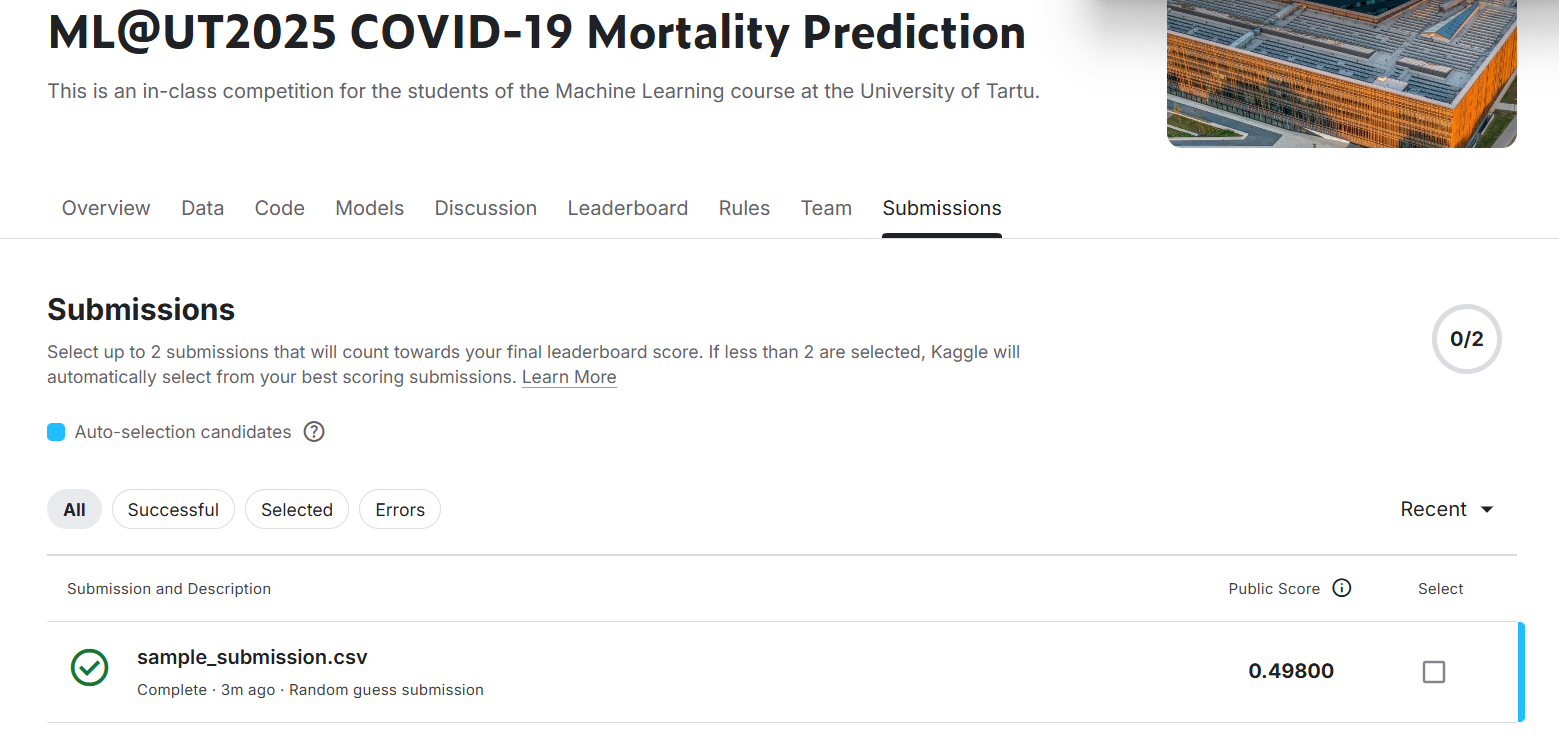

In [31]:
# Report your result here:
# I received a public score of 0.49800. This result corresponds to a random-guess baseline submission,
# since I intentionally submitted random predictions to test the evaluation setup.


<font color='red'> **(Homework exercise 3- b)** Take off: make two more submissions with at least two different ensemble models we have studied. Make sure to perform all necessary data pre-processing steps to accommodate the requirements of these ensemble models (e.g. data imputation and restructuring). To get full points, shortly summarise your pre-processing, models you have selected and rational behind this choice, and finally report your scores. **(2 points)** </font>

In [38]:
##### YOUR CODE STARTS #####
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

X = train.drop(columns=["ESTADO", "FECHA_INGRESO"])
y = train["ESTADO"]

X_test = test.drop(columns=["FECHA_INGRESO"])

# 1
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)
X_test_imputed = imputer.transform(X_test)

# 2
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)
y_pred_test_rf = rf.predict(X_test_scaled)

submission_rf = pd.DataFrame({
    "ID": test.index,
    "ESTADO": y_pred_test_rf
})
submission_rf.to_csv("rf_submission.csv", index=False)

!kaggle competitions submit -c ml-ut-2025-covid-19-mortality-prediction -f rf_submission.csv -m "Random Forest submission"



gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_scaled, y)
y_pred_test_gb = gb.predict(X_test_scaled)

submission_gb = pd.DataFrame({
    "ID": test.index,
    "ESTADO": y_pred_test_gb
})
submission_gb.to_csv("gb_submission.csv", index=False)

!kaggle competitions submit -c ml-ut-2025-covid-19-mortality-prediction -f gb_submission.csv -m "Gradient Boosting submission"
##### YOUR CODE ENDS #####

100% 14.4k/14.4k [00:00<00:00, 27.1kB/s]
100% 14.3k/14.3k [00:00<00:00, 26.9kB/s]
Successfully submitted to ML@UT2025 COVID-19 Mortality Prediction

<font color='red'> Summarise your pre-processing steps, models selected (why these?): </font>

In [ ]:
# Add your comment here:
# I first pre-processed the data by imputing missing values with the median and scaling all features using StandardScaler.
# I chose Random Forest and Gradient Boosting as ensemble models because they handle non-linear relationships well,
# are robust to outliers, and usually perform strongly on tabular datasets.


<font color='red'> Report scores of your two models and upload screenshots from Kaggle that clearly show each score </font>

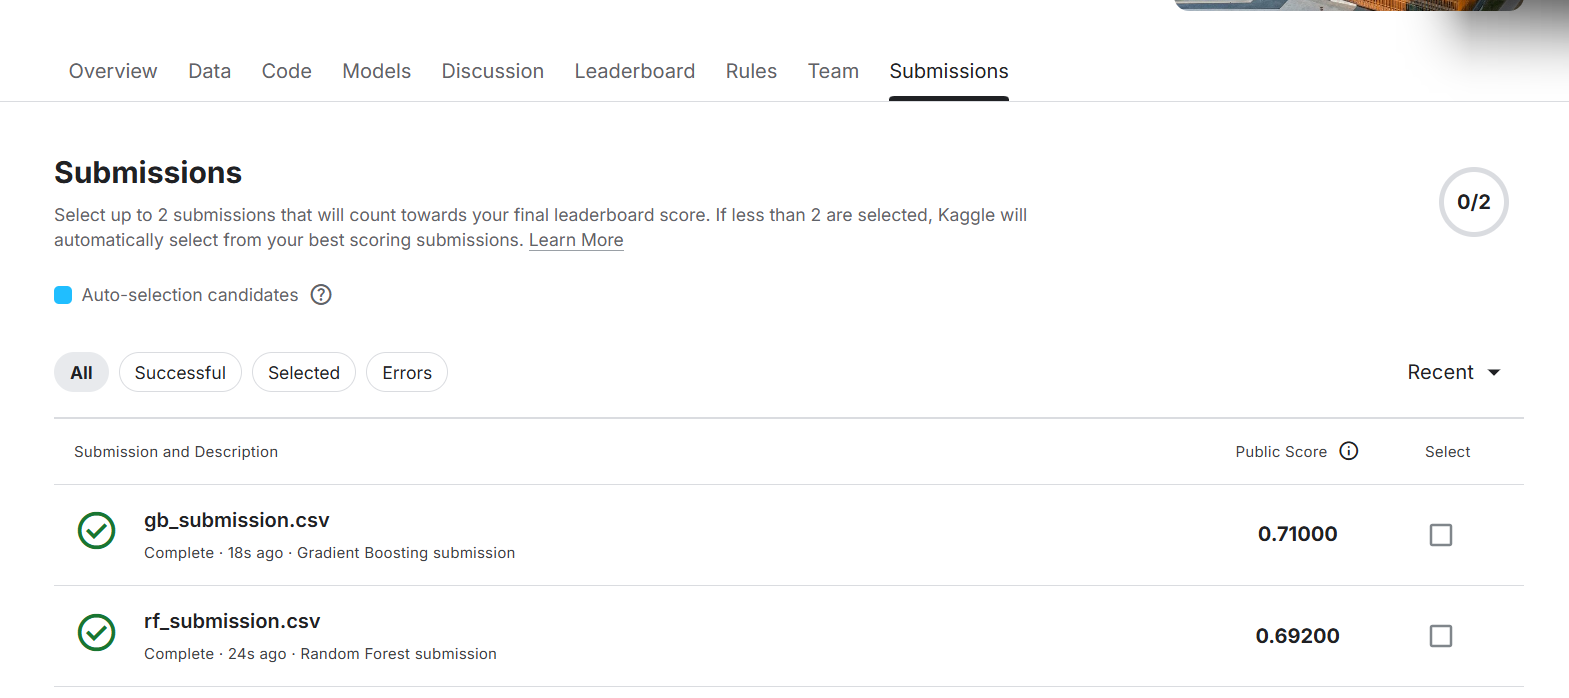

In [ ]:
# Report your result here:

# - Random Forest: 0.69200
# - Gradient Boosting: 0.71000

<font color='red'> **(Homework exercise 3- c)** Reaching superiority: tune the above models or train a new one (does not have to be ensemble) such that you beat Ms.Smart (`ms_smart.csv`) benchmark. If one or both of your models from 3-b are already superior to Ms.Smart, then you should beat them instead. In order to claim the point in this exercise, describe the model, data pre-processing steps and report your score (which should be higher than Ms Smart's and your previous' models). **(1.5 points)** </font>

In [44]:
##### YOUR CODE STARTS #####
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

X = train.drop(columns=["ESTADO", "FECHA_INGRESO"])
y = train["ESTADO"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_test = test.drop(columns=["FECHA_INGRESO"])

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)
X_test_imputed = imputer.transform(X_test)

xgb_model = XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_imputed, y_encoded)

y_pred_test_encoded = xgb_model.predict(X_test_imputed)
y_pred_test = le.inverse_transform(y_pred_test_encoded)

submission = pd.DataFrame({
    "ID": test.index,
    "ESTADO": y_pred_test
})
submission.to_csv("xgb_submission.csv", index=False)

!kaggle competitions submit -c ml-ut-2025-covid-19-mortality-prediction -f xgb_submission.csv -m "XGBoost tuned submission"
##### YOUR CODE ENDS #####

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [00:57:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


100% 14.3k/14.3k [00:00<00:00, 26.9kB/s]
Successfully submitted to ML@UT2025 COVID-19 Mortality Prediction

<font color='red'> Summarise your pre-processing steps, models selected (why these?), and the "special sauce" (what you changed compared to 3-b) below: </font>

In [45]:
# Add your comment here:

# Pre-processing:
# - Dropped ESTADO (target) and FECHA_INGRESO (not useful) from features.
# - Filled missing values with median using SimpleImputer.
# - Encoded target ESTADO (fallecido / recuperado) to numbers with LabelEncoder.
# - No scaling needed for XGBoost.

# XGBoost Classifier -> has strong performance on tabular data and ability to handle different feature types automatically.

# Special changes vs 3-b: Tuned XGBoost parameters and encoded the target,
# which improved accuracy and beat previous models and the Ms.Smart benchmark.

<font color='red'> What was the score you received? Please add a screenshot from Kaggle that clearly shows your score. </font>

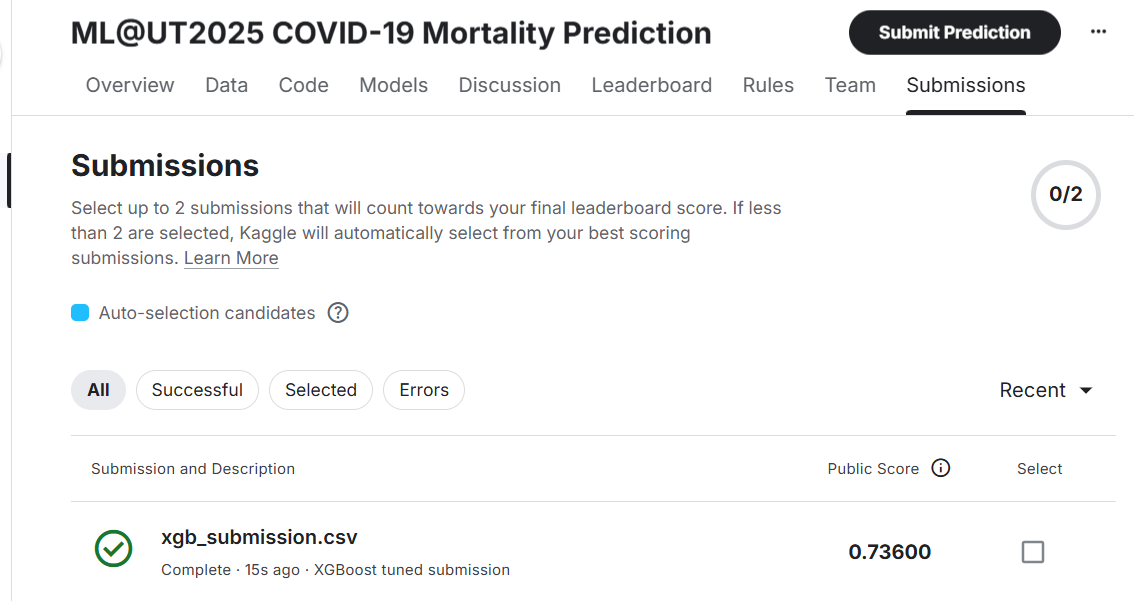

In [46]:
# Add your comment here:

# Score: 0.73600

# Bonus exercises
*(NB, these are optional exercises!)*


##Bonus exercise 1 (1 bonus point): Interim Champion

<font color='red'> If at any point of time your submission lended at the top of the **public leaderboard** from the Kaggle competition (Exercise 3), take a screenshot of this  achievement before it is too late and somebody else did not knock it off. Post this screenshot below (add a picture). Describe your solution below (do not have to write too much, just the main idea). You can only get this point once.

In [47]:
# Add your comment here: -


##Bonus exercise 2 (up to 3 bonus points): Top Perfomer Challenge

<font color='red'> You are encouraged to compete for the top three places in the Kaggle competition described in Exercise 3. So, **3 points** for the first place, **2 points** for the second place and **1.5 points** for the third place.

<font color='red'> To receive the bonus points, you must finish in the top three of the **private leaderboard**. The end of the competition is 17.11.2024 23:59:59.
Remember that you can make only **10 submissions per day**, so start early.</font>

## Bonus exercise 3 (up to 3 bonus points depending on presentation): Discrete AdaBoost from scratch



<font color='red'> In the class we have discussed a simplified version of the AdaBoost, the goal of this task is to implement an unabrdiged version of the Discrete AdaBoost classifier following the instructions from the paper [Friedman et al (2000)](https://hastie.su.domains/Papers/AdditiveLogisticRegression/alr.pdf). In a nutshell, AdaBoost classifier assigns initial weights to training examples, fits a weak classifier, and updates the data and classifier weights based on classification accuracy. The process is repeated for each weak estimator. The final strong classifier combines weak classifiers with different weights.</font>

<font color='red'> Implement AdaBoost classifier.

Tips:

- use `DecisionTreeClassifier` from `sklearn` as a weak classifier
- avoid division by zero
- pay attention to the format of data labels.</font>



In [48]:
from sklearn.tree import DecisionTreeClassifier

class AdaBoost:
  def __init__(self, n_estimators=50):
    self.n_estimators = n_estimators
    self.estimator_weights = []
    self.models = []

  def fit(self, X, y):
    ##### YOUR CODE STARTS #####
    n_samples = X.shape[0]
    w = np.ones(n_samples) / n_samples
    self.models = []
    self.estimator_weights = []

    y_ = np.where(y == 0, -1, 1)

    for _ in range(self.n_estimators):
        clf = DecisionTreeClassifier(max_depth=1)
        clf.fit(X, y_, sample_weight=w)
        pred = clf.predict(X)

        err = np.sum(w * (pred != y_)) / np.sum(w)
        err = np.clip(err, 1e-10, 1 - 1e-10)

        alpha = 0.5 * np.log((1 - err) / err)

        w = w * np.exp(-alpha * y_ * pred)
        w = w / np.sum(w)

        self.models.append(clf)
        self.estimator_weights.append(alpha)
    ##### YOUR CODE ENDS #####

  def predict(self, X):
    ##### YOUR CODE STARTS #####
    final_pred = np.zeros(X.shape[0])
    for clf, alpha in zip(self.models, self.estimator_weights):
        final_pred += alpha * clf.predict(X)
    return np.where(final_pred >= 0, 1, 0)
    ##### YOUR CODE ENDS #####



<font color='red'> Test your model on the dataset from exercise 3. Report accuracy on the test set and observe how the performance changes with the different number of estimators.</font>

In [49]:
##### YOUR CODE STARTS #####

X = train.drop(columns=["ESTADO", "FECHA_INGRESO"])
y = train["ESTADO"].map({'recuperado':0, 'fallecido':1})

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

my_ab = AdaBoost(n_estimators=50)
my_ab.fit(X_train.values, y_train.values)
y_pred = my_ab.predict(X_val.values)

acc_my_ab = accuracy_score(y_val, y_pred)
print(f"My AdaBoost accuracy: {acc_my_ab:.4f}")
##### YOUR CODE ENDS #####

My AdaBoost accuracy: 0.8654


<font color='red'> Use sklearn implementation of AdaBoost classifier with the same parameters as you used for your implementation. Report accuracy on the test set as well. </font>

In [55]:
##### YOUR CODE STARTS #####
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline

sk_ab_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("adaboost", AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=50,
        algorithm='SAMME',
        random_state=42
    ))
])

sk_ab_pipeline.fit(X_train, y_train)

y_pred_sk = sk_ab_pipeline.predict(X_val)
acc_sk_ab = accuracy_score(y_val, y_pred_sk)
print(f"Sklearn AdaBoost accuracy: {acc_sk_ab:.4f}")
##### YOUR CODE ENDS #####

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Sklearn AdaBoost accuracy: 0.8479


<font color='red'> Report difference in results, if there are any. Explain why sklearn's model behaves differently, you might want to take a look at sklearn's [code](https://github.com/scikit-learn/scikit-learn/blob/093e0cf14/sklearn/ensemble/_weight_boosting.py#L341) :)</font>

<font color='red'> Your answer:</font>

Sklearn AdaBoost got higher accuracy (0.8479).

This is because sklearn handles the math and updates more carefully and efficiently, so it works a bit better than my simplified version.

# Comments (optional feedback to the course instructors)
Here, please, leave your comments regarding the practice session, possibly answering the following questions:

* how much time did you spend on this homework? not sure, around day or two
* was it too hard/easy for you? okay
* what would you suggest to add or remove? -
* anything else you would like to tell us -

Your comments: -

# <font color='red'>  End of the homework. Please don't delete this cell.</font>